# Parcial 3 Modelado

- ### Primer Punto
    ### Modelo SIR
   
    $$\frac{dS}{dt}=-\beta \frac{SI}{N}$$
    $$\frac{dI}{dt}=\beta \frac{SI}{N}-\gamma I$$
    $$\frac{dR}{dt}=\gamma I$$

   

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd


In [24]:
#### Read data ####

df = pd.read_csv('./influenza_data.csv')
infected = df['AH1']+df['AH3']+df['A_untyped']+df['B']

# just B influenza cases
infected = df['B']

time = df['week']

time = time[7:]
infected = infected[7:]
print(time.iloc[0])

47


(None,
 Text(0.5, 1.0, 'Confirmed B influenza cases'))

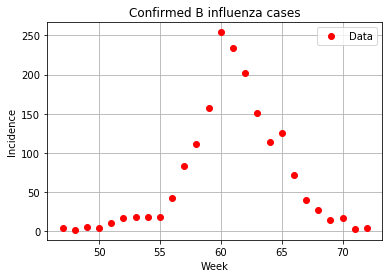

In [25]:
plt.plot(time,infected,'ro',label='Data')
plt.xlabel('Week'), plt.ylabel('Incidence')
plt.grid(), plt.legend(), plt.title('Confirmed B influenza cases')

In [26]:
def SIR_model(state,time,beta,gamma, N):
    S, I, R = state
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I
    dRdt = gamma*I
    return [dSdt,dIdt,dRdt]
def modelo_sir(N, gamma_mine,Ro, t0):
    beta_mine = gamma_mine*Ro 
    t_span =np.arange(t0,t0*10,1) # daily simulation

    # For initial conditions we suppose just 1 person is infected
    y0 = [N-1,1,0] #initial conditions 
    return(odeint(SIR_model, y0, t_span, args=(beta_mine, gamma_mine, N)) )#solve using ODE

def log_likelihood(x_data,miu):
    n=len(x_data)
    var=(1/n)*np.sum((x_data-np.mean(x_data))**2)
    if type(x_data)==list:
        x_data=np.array(x_data)
    l=(-n/2)*np.log(2*var*np.pi)- (1/(2*var))*np.sum((x_data-miu)**2)
    return(l)

def funcionverosimilitud(gamma, Ro, t0,N):
    y=modelo_sir(N, gamma,Ro, t0) 
    beta= gamma*Ro 
    S = y[:,0]
    I = y[:,1]
    R = y[:,2]

    t_span =np.arange(t0,t0*10,1)
    kernel  = np.ones(7)
    incidente_pred=[]
    i=0
    while i<len(S)-7:
        incidente_pred.append(-(S[i+7]-S[i]))

        i=i+7
    incidente_pred = np.append(1,incidente_pred)
    frac_confirmed = sum(infected)/sum(incidente_pred)
    incidente_pred = incidente_pred*frac_confirmed
    miu=np.mean(incidente_pred )
    l=log_likelihood(infected,miu)
    return(l)



In [33]:
funcionverosimilitud(1/3, 12, 47,5.2e+07)


-152.7830210934705

In [21]:
# 1er punto

gamma=1/3
Ro=np.arange(0, 3, 0.001)
t0=47*7
N= 5.2e+07
v=[]
for i in Ro: 
    v.append(funcionverosimilitud(gamma, i, t0,N))

In [22]:
# 2do punto

gamma=1/3
Ro=2
t0=np.arange(0, 100, 7)
N= 5.2e+07
v=[]
for i in t0: 
    v.append(funcionverosimilitud(gamma, Ro, i,N))

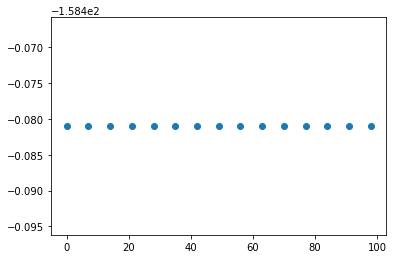

In [20]:
plt.scatter(Ro,v)

In [ ]:
def proba_Q(xi, miu):
    var=5
    p = ((1/np.sqrt(var*2*np.pi))*np.exp(-(xi-miu)**2/(2*var)))
    return(p)

def likelihood(x_data,miu):
    l=1
    for x in x_data:
        l = l * proba_Q(x, miu)
    return(l)
